c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006\ch05
c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006
===========iteration:0===========
SGD:2.3080674776953867
Momentum:2.445828655411276
AdaGrad:1.980900187636439
Adam:2.213778160290219
===========iteration:100===========
SGD:1.3330243344586914
Momentum:0.31534964551238476
AdaGrad:0.13072376470021224
Adam:0.22093313889855612
===========iteration:200===========
SGD:0.652261286695661
Momentum:0.24416937064778857
AdaGrad:0.10475335537920015
Adam:0.21539250062312698
===========iteration:300===========
SGD:0.576854807048963
Momentum:0.24889806478368554
AdaGrad:0.08562515399030271
Adam:0.1279791455153204
===========iteration:400===========
SGD:0.45722109165351393
Momentum:0.3509411200739155
AdaGrad:0.16008968215950795
Adam:0.28479315989857146
===========iteration:500===========
SGD:0.37480296008963904
Momentum:0.1952076665645626
AdaGrad:0.06558359013238346
Adam:0.103126145824

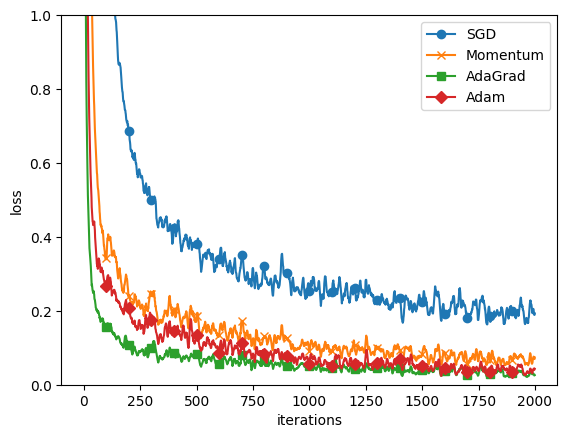

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 0. MNIST 데이터 읽기 ==
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정 ==
optimizers = {}
optimizers ['SGD' ] = SGD()
optimizers ['Momentum' ] = Momentum()
optimizers ['AdaGrad' ] = AdaGrad()
optimizers ['Adam'] = Adam()
#optimizers ['RMSprop' ] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks [key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss [key] = []

# 2. 훈련 시작 ==
for i in range(max_iterations):
    batch_mask = np.random. choice(train_size, batch_size)
    x_batch = x_train [batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks [key].gradient(x_batch, t_batch)
        optimizers [key].update(networks [key].params, grads)

        loss = networks [key]. loss(x_batch, t_batch)
        train_loss [key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks [key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기=
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt. legend()
plt.show()